# Medical Image Analysis project - "Numerical Methods for Coupled Reconstruction and Registration in Digital Breast Tomosynthesis"

https://arxiv.org/pdf/1307.6008


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage

## Generation of a 3D full torus:
The carthesian equation of a 3D full torus of hole radius $c$ and tube radius $a$ is:
$$ (c - \sqrt(x^2 + y^2) )^2 + z^2 \leq a^2 $$

This can be stored in a 3D Numpy array.

In [2]:
# Discretization along axes
d = 71
x = np.linspace(-35, 35, d)
y = np.linspace(-35, 35, d)
z = np.linspace(-35, 35, d)

# Grid coordinates
xx, yy, zz = np.meshgrid(x, y, z, sparse=False)

# Torus definition
c, a = 16, 8
torus = ( (c - np.sqrt(xx**2 + yy**2))**2 + zz**2 - a**2 <= 0).transpose(0,2,1)

Visualization:

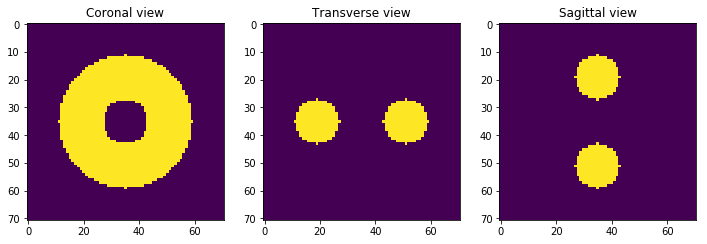

In [3]:
plt.figure(figsize=(12,4))
plt.subplot("131")
plt.title("Coronal view")
plt.imshow(torus[:,d//2,:])
plt.subplot("132")
plt.title("Transverse view")
plt.imshow(torus[d//2,:,:])
plt.subplot("133")
plt.title("Sagittal view")
plt.imshow(torus[:,:,d//2])
plt.show()

**Fixed image:**

In [4]:
f1 = torus.copy()

**Moving image:** result of an affine transformation. Translation and rotation about the y axis of $-30$ degrees.

In [9]:
# Parameters
angle = (-30/360)*2*np.pi
translation = np.array([5, 0, 12])

# Discretization along axes
x = np.linspace(-35, 35, d)
y = np.linspace(-35, 35, d)
z = np.linspace(-35, 35, d)

# Grid of coordinates
xx, yy, zz = np.meshgrid(x, y, z, sparse=False)

# Rotation (performed on the vector space instead of directly on the tore to avoid interpolation problems)
coord = np.vstack((xx.flatten(),yy.flatten(),zz.flatten())) 
rotation = np.array([[np.cos(angle), 0, -np.sin(angle)],
                     [0, 1, 0],
                     [np.sin(angle), 0, np.cos(angle)]])
new_coord = np.matmul(rotation, coord)


# Redefinition of grid of coordinates after rotation
xx = new_coord[0].reshape((d,d,d))
yy = new_coord[1].reshape((d,d,d))
zz = new_coord[2].reshape((d,d,d))


# Rotated torus definition
r_torus = ( (c - np.sqrt(xx**2 + yy**2))**2 + zz**2 - a**2 <= 0).transpose(0,2,1)


# Translation
(x, y, z) = np.where(r_torus)
x2 = np.clip((x+translation[0]),0, d-1)
y2 = np.clip((y+translation[1]),0, d-1)
z2 = np.clip((z+translation[2]),0, d-1)
f2 = np.zeros((d, d, d))
# Moving image
f2[x2, y2, z2] = 1

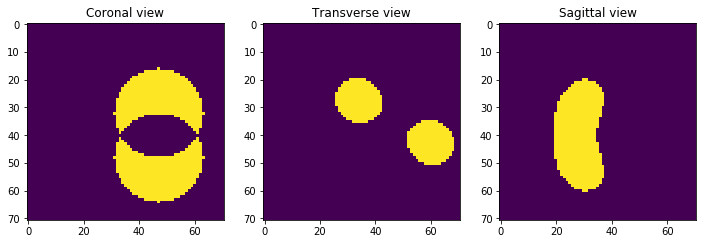

In [10]:
plt.figure(figsize=(12,4))
plt.subplot("131")
plt.title("Coronal view")
plt.imshow(f2[:,d//2,:])
plt.subplot("132")
plt.title("Transverse view")
plt.imshow(f2[d//2,:,:])
plt.subplot("133")
plt.title("Sagittal view")
plt.imshow(f2[:,:,d//2])
plt.show()